In [1]:
import os
import sys
from pathlib import Path

ASL = os.path.join(str(Path.home()), "ASL")
src = os.path.join(str(Path.home()), "ASL", "src")
os.chdir( ASL )
sys.path.append(ASL)
sys.path.append(src)


from lightning import Network
from utils_asl import load_yaml
from visu import Visualizer

vi = Visualizer(p_visu="test")

textwidth = 12.7 #cm


import matplotlib
import matplotlib.pyplot as plt
import skimage
from PIL import Image, ImageDraw
import imageio 
import numpy as np
import torch
import cv2
import pandas
from visu import *


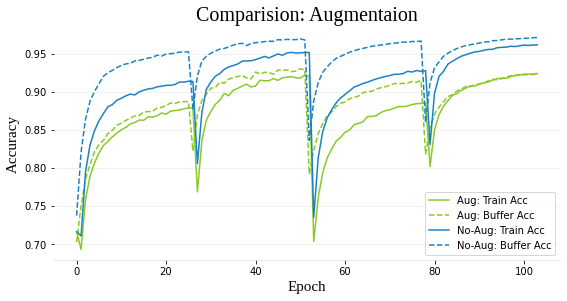

In [25]:
aug_train = "docs/aug_no_aug/aug_acc/MTJON-6__logs_train_acc.csv"
aug_train_buffer = "docs/aug_no_aug/aug_acc/MTJON-6__logs_train_acc_replayed.csv"

no_aug_train = "docs/aug_no_aug/no_aug_acc/MTJON-7__logs_train_acc.csv"
no_aug_train_buffer = "docs/aug_no_aug/no_aug_acc/MTJON-7__logs_train_acc_replayed.csv"
from numpy import genfromtxt

aug_train = genfromtxt(aug_train, delimiter=',')
aug_train_buffer = genfromtxt(aug_train_buffer, delimiter=',')
no_aug_train = genfromtxt(no_aug_train, delimiter=',')
no_aug_train_buffer = genfromtxt(no_aug_train_buffer, delimiter=',')


import matplotlib.pyplot as plt
import numpy as np

from visu.colors import *
cols = [ (np.array(it)/255).tolist() for it in  COL_DICT.values() ][1:]


fig, ax = plt.subplots(figsize=(8,4.2))
left  = 0.09  # the left side of the subplots of the figure
right = 0.97    # the right side of the subplots of the figure
bottom = 0.13   # the bottom of the subplots of the figure
top = 0.9  # the top of the subplots of the figure
wspace = 0.0   # the amount of width reserved for blank space between subplots
hspace = 0  # the amount of height reserved for white space between subplots

plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

cols[0] = cols[1]
cols[3] = cols[2]

ax = plt.subplot()
ma = ['-','dashed','-','dashed']
for c, m, n in zip( cols,ma, [aug_train, aug_train_buffer, no_aug_train, no_aug_train_buffer]):
    plt.plot(aug_train[:104,0], n[:104,2] , linestyle=m, color = c)

plt.legend(["Aug: Train Acc","Aug: Buffer Acc", "No-Aug: Train Acc","No-Aug: Buffer Acc"] )
plt.title("Comparision: Augmentaion", fontname= 'Liberation Serif', fontsize= 20)   
#plt.grid(True)
#plt.grid_x(False)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.set_ylabel("Accuracy",fontsize=15, fontname= 'Liberation Serif')
ax.set_xlabel("Epoch",fontsize=15, fontname= 'Liberation Serif')
plt.show()
from visu.visualizer import get_img_from_fig
arr = get_img_from_fig(fig, dpi=300)
plt.close()
imageio.imwrite( f"docs/comparison_aug.png", arr)
